Multi armed bandit Epsilon Greedy
Q(St, AL) = Q(St, Al) (current) + a(Ri+1 + y maxa Q(St+1,a) - Q(St, At)) for Q value update

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining problem
num_arms = 10
mean = 0.5
stdv = 0.1
arms = np.random.normal(mean, stdv, num_arms)

In [3]:
class EpsilonGreedyPolicy:
    def __init__(self, num_arms, epsilon):
        self.num_arms = num_arms
        self.epsilon = epsilon
        self.q_values = np.zeros(num_arms)
        self.counts = np.zeros(num_arms)
    
    def select_action(self):
        if np.random.random() < self.epsilon:
            return np.random.randint(self.num_arms)
        else:
            return np.argmax(self.q_values)
    
    def update(self, action, reward):
        self.counts[action] += 1
        alpha = 1 / self.counts[action]
        self.q_values[action] += alpha * (reward - self.q_values[action])

In [4]:
num_trials = 1000
epsilon = 0.1

bandit_algo = EpsilonGreedyPolicy(num_arms, epsilon)
rewards = []

for i in range(num_trials):
    action = bandit_algo.select_action()
    reward = np.random.binomial(1, arms[action])
    bandit_algo.update(action, reward)
    rewards.append(reward)

Q values:  [0.41666667 0.68988764 0.52941176 0.4        0.4        0.5
 0.16666667 0.41666667 0.45454545 0.6       ]


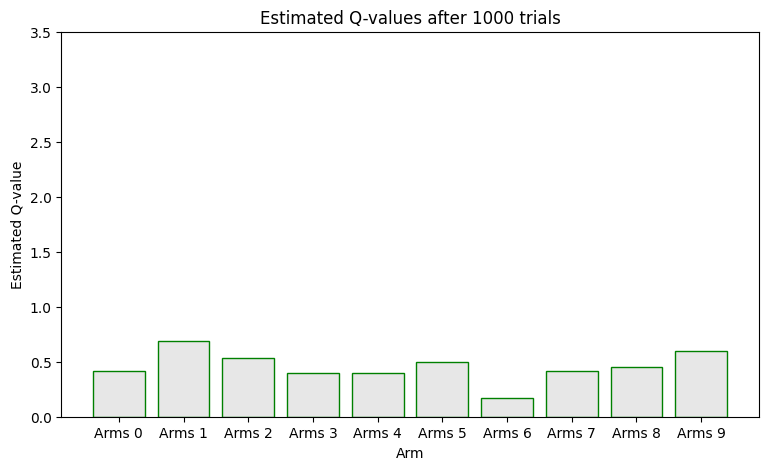

In [6]:
print("Q values: ", bandit_algo.q_values)

plt.figure(figsize=[9,5])
plt.bar(range(num_arms), bandit_algo.q_values, color=(0.1, 0.1, 0.1, 0.1), edgecolor='green')
plt.xlabel('Arm')
plt.ylabel('Estimated Q-value')
plt.xticks(range(num_arms), ['Arms {}'.format(i) for i in range(num_arms)])
plt.ylim(0, 3.5)
plt.title('Estimated Q-values after 1000 trials')
plt.show()

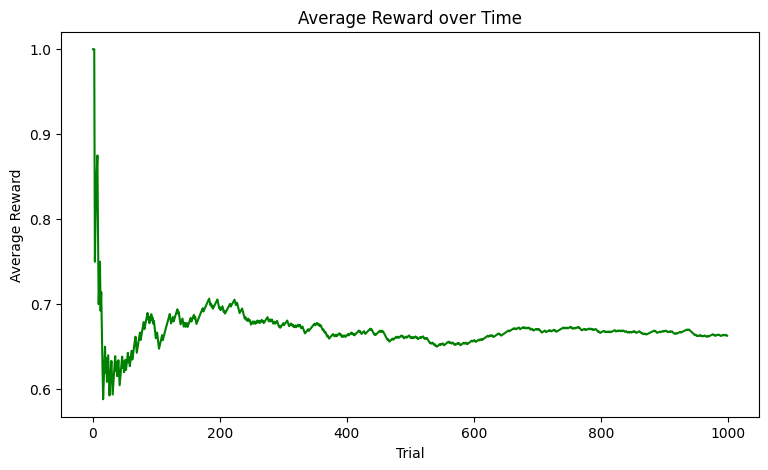

In [7]:
cumulative_rewards = np.cumsum(rewards)
average_rewards = cumulative_rewards / np.arange(1, num_trials + 1)
plt.figure(figsize=[9, 5])
plt.plot(average_rewards, color='green')
plt.xlabel('Trial')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time')
plt.show()